Deteksi Serangan Jaringan: Data paket jaringan dapat digunakan untuk mendeteksi serangan jaringan, serangan port scanning, atau serangan lainnya yang mencurigakan.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

file_path = "/content/drive/MyDrive/semester 7/UTS ABD/dataset.csv"
df = pd.read_csv(file_path, error_bad_lines=False)
df.head()

<ipython-input-3-9b79a2368638>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 65583: expected 13 fields, saw 16



,frame.time,frame.number,frame.len,ip.src,ip.dst,ip.proto,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.options.timestamp.tsval,tcp.options.timestamp.tsecr
Jan 30,2023 08:00:07.659217000 SE Asia Standard Time,1,64468,10.10.1.198,172.217.194.95,6.0,59620.0,443.0,1.0,1.0,1.884492e+09,1.478814e+09
Jan 30,2023 08:00:07.659805000 SE Asia Standard Time,2,64468,10.10.1.198,172.217.194.95,6.0,59620.0,443.0,64401.0,1.0,1.884492e+09,1.478814e+09
Jan 30,2023 08:00:07.659962000 SE Asia Standard Time,3,64468,10.10.1.198,172.217.194.95,6.0,59620.0,443.0,128801.0,1.0,1.884492e+09,1.478814e+09
Jan 30,2023 08:00:07.660492000 SE Asia Standard Time,4,64468,10.10.1.198,172.217.194.95,6.0,59620.0,443.0,193201.0,1.0,1.884492e+09,1.478814e+09
Jan 30,2023 08:00:07.661219000 SE Asia Standard Time,5,64468,10.10.1.198,172.217.194.95,6.0,59620.0,443.0,257601.0,1.0,1.884492e+09,1.478814e+09


In [4]:
df.tail()

,frame.time,frame.number,frame.len,ip.src,ip.dst,ip.proto,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.options.timestamp.tsval,tcp.options.timestamp.tsecr
Jan 30,2023 08:00:47.979042000 SE Asia Standard Time,253671,14068,10.10.1.198,172.217.194.95,6.0,59620.0,443.0,474644257.0,27328.0,1.884532e+09,1.478854e+09
Jan 30,2023 08:00:47.995436000 SE Asia Standard Time,253672,80,172.217.194.95,10.10.1.198,6.0,443.0,59620.0,27328.0,473559297.0,1.478855e+09,1.884532e+09
Jan 30,2023 08:00:47.995436000 SE Asia Standard Time,253673,88,172.217.194.95,10.10.1.198,6.0,443.0,59620.0,27328.0,473559297.0,1.478855e+09,1.884532e+09
Jan 30,2023 08:00:47.995436000 SE Asia Standard Time,253674,96,172.217.194.95,10.10.1.198,6.0,443.0,59620.0,27328.0,473559297.0,1.478855e+09,1.884532e+09
Jan 30,2023 08:00:47.995468000 SE Asia Standard Time,253675,2868,10.10.1.198,172.217.194.95,6.0,59620.0,443.0,474658257.0,27328.0,1.884532e+09,1.478855e+09


In [3]:
import pandas as pd

# Informasi umum tentang dataset, termasuk tipe data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 253674 entries, Jan 30 to Jan 30
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   frame.time                   253674 non-null  object 
 1   frame.number                 253674 non-null  int64  
 2   frame.len                    253674 non-null  int64  
 3   ip.src                       253402 non-null  object 
 4   ip.dst                       253402 non-null  object 
 5   ip.proto                     253402 non-null  float64
 6   tcp.srcport                  253391 non-null  float64
 7   tcp.dstport                  253391 non-null  float64
 8   tcp.seq                      253391 non-null  float64
 9   tcp.ack                      253391 non-null  float64
 10  tcp.options.timestamp.tsval  253259 non-null  float64
 11  tcp.options.timestamp.tsecr  253259 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 25.2+ MB


In [4]:
# Statistik deskriptif untuk kolom-kolom numerik
print(df.describe())


        frame.number      frame.len       ip.proto    tcp.srcport  \
count  253674.000000  253674.000000  253402.000000  253391.000000   
mean   126838.241475    1955.036559       6.000478    2564.706683   
std     73229.852448   10495.029749       0.072473   10973.375308   
min         1.000000      44.000000       6.000000      22.000000   
25%     63419.250000      96.000000       6.000000     443.000000   
50%    126838.500000      96.000000       6.000000     443.000000   
75%    190256.750000      96.000000       6.000000     443.000000   
max    253675.000000   64468.000000      17.000000   59620.000000   

         tcp.dstport       tcp.seq       tcp.ack  tcp.options.timestamp.tsval  \
count  253391.000000  2.533910e+05  2.533910e+05                 2.532590e+05   
mean    57484.365664  8.504270e+06  2.421304e+08                 1.493428e+09   
std     11009.771967  5.124853e+07  2.675817e+08                 8.461248e+07   
min        22.000000  0.000000e+00  0.000000e+00      

In [5]:
# Jumlah data yang hilang dalam setiap kolom
print(df.isnull().sum())

frame.time                       0
frame.number                     0
frame.len                        0
ip.src                         272
ip.dst                         272
ip.proto                       272
tcp.srcport                    283
tcp.dstport                    283
tcp.seq                        283
tcp.ack                        283
tcp.options.timestamp.tsval    415
tcp.options.timestamp.tsecr    415
dtype: int64


In [6]:
df = df.dropna()
print(df.isnull().sum())

frame.time                     0
frame.number                   0
frame.len                      0
ip.src                         0
ip.dst                         0
ip.proto                       0
tcp.srcport                    0
tcp.dstport                    0
tcp.seq                        0
tcp.ack                        0
tcp.options.timestamp.tsval    0
tcp.options.timestamp.tsecr    0
dtype: int64


In [7]:
# Menampilkan nama kolom-kolom dalam dataset
print(df.columns)


Index(['frame.time', 'frame.number', 'frame.len', 'ip.src', 'ip.dst',
       'ip.proto', 'tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack',
       'tcp.options.timestamp.tsval', 'tcp.options.timestamp.tsecr'],
      dtype='object')


In [8]:
df = df.drop_duplicates()
df.duplicated()

Jan 30    False
Jan 30    False
Jan 30    False
Jan 30    False
Jan 30    False
          ...  
Jan 30    False
Jan 30    False
Jan 30    False
Jan 30    False
Jan 30    False
Length: 253259, dtype: bool

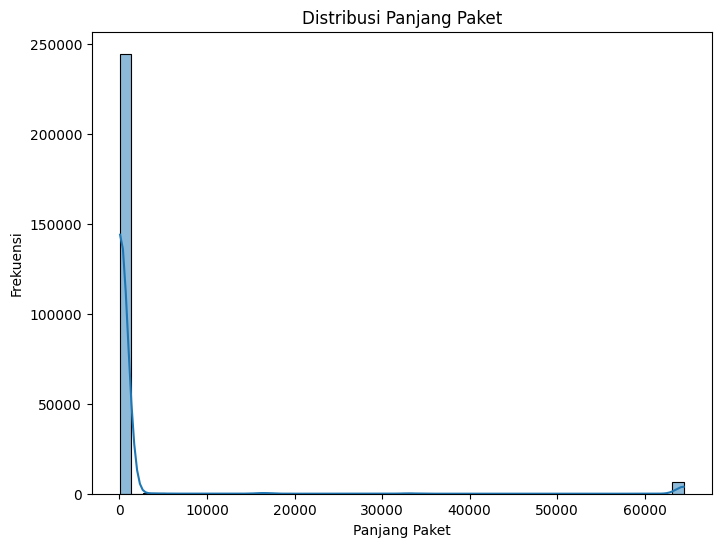

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk panjang paket
plt.figure(figsize=(8, 6))
sns.histplot(df['frame.len'], bins=50, kde=True)
plt.xlabel('Panjang Paket')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Paket')
plt.show()


<ipython-input-10-3c8456ea963e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


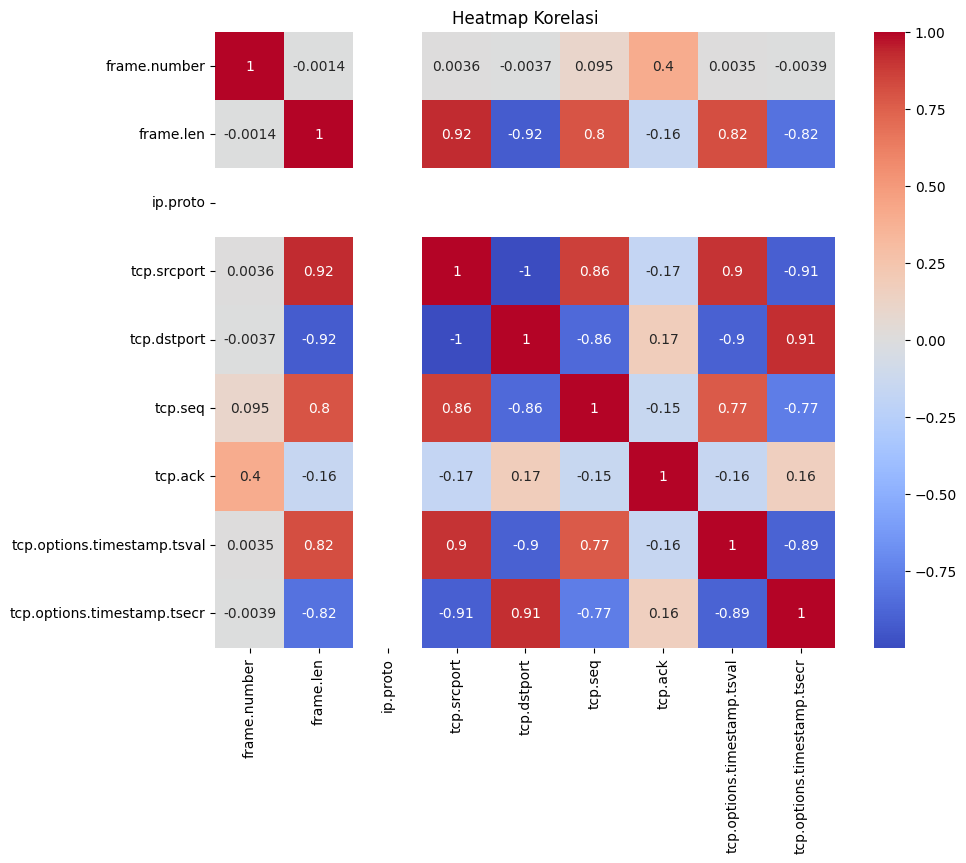

In [10]:
# Heatmap untuk melihat korelasi antara kolom-kolom numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


Text(0, 0.5, 'TCP Destination Port')

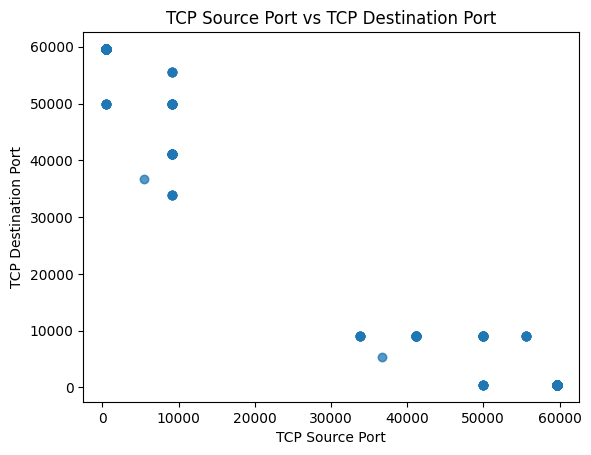

In [11]:
plt.scatter(df['tcp.srcport'], df['tcp.dstport'], alpha=0.5)
plt.title('TCP Source Port vs TCP Destination Port')
plt.xlabel('TCP Source Port')
plt.ylabel('TCP Destination Port')


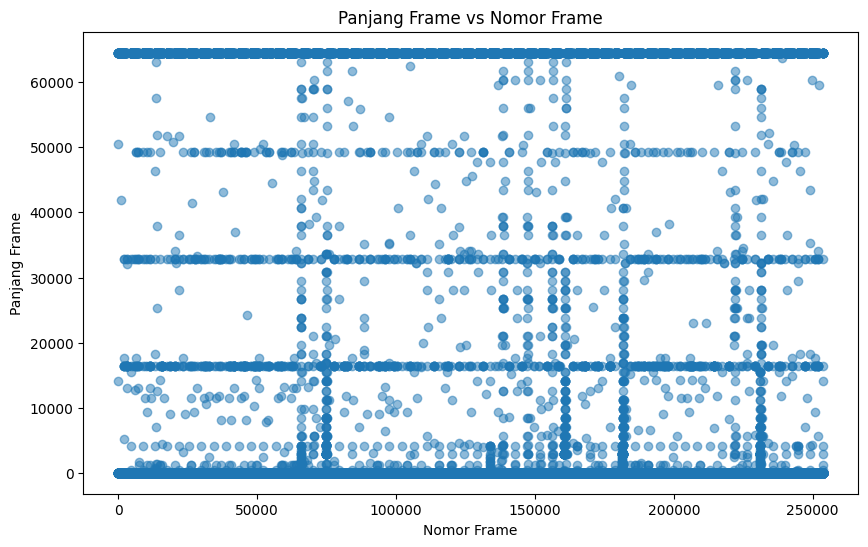

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['frame.number'], df['frame.len'], alpha=0.5)
plt.title('Panjang Frame vs Nomor Frame')
plt.xlabel('Nomor Frame')
plt.ylabel('Panjang Frame')
plt.show()

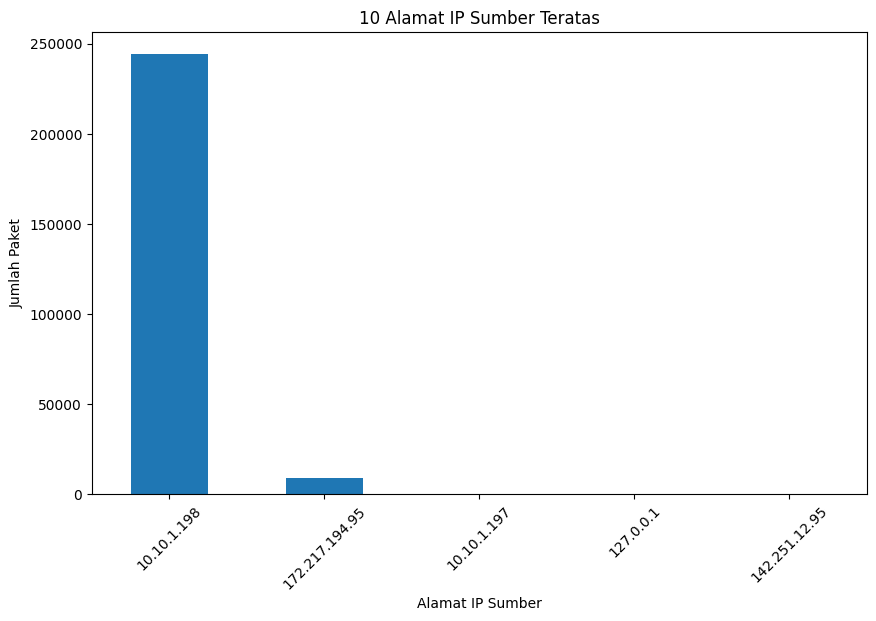

In [13]:
# Diagram Batang untuk menghitung jumlah paket per alamat IP
plt.figure(figsize=(10, 6))
source_counts = df['ip.dst'].value_counts().head(10)
source_counts.plot(kind='bar')
plt.xlabel('Alamat IP Sumber')
plt.ylabel('Jumlah Paket')
plt.title('10 Alamat IP Sumber Teratas')
plt.xticks(rotation=45)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

print(df.head())


        frame.time  frame.number  frame.len  ip.src  ip.dst  ip.proto  \
Jan 30           0             1      64468       1       4       6.0   
Jan 30           1             2      64468       1       4       6.0   
Jan 30           2             3      64468       1       4       6.0   
Jan 30           3             4      64468       1       4       6.0   
Jan 30           4             5      64468       1       4       6.0   

        tcp.srcport  tcp.dstport   tcp.seq  tcp.ack  \
Jan 30      59620.0        443.0       1.0      1.0   
Jan 30      59620.0        443.0   64401.0      1.0   
Jan 30      59620.0        443.0  128801.0      1.0   
Jan 30      59620.0        443.0  193201.0      1.0   
Jan 30      59620.0        443.0  257601.0      1.0   

        tcp.options.timestamp.tsval  tcp.options.timestamp.tsecr  
Jan 30                 1.884492e+09                 1.478814e+09  
Jan 30                 1.884492e+09                 1.478814e+09  
Jan 30                 1.8844

In [19]:
some_condition = (df['ip.proto'] == 6) & (df['frame.len'] > 1000) & (df['tcp.dstport'] == 443)
unusual_connections = df[df['frame.len'] > 1000000000]
unusual_connections = df[(df['tcp.srcport'] < 1024) | (df['tcp.dstport'] < 1024)]
unusual_connections = df[(df['frame.len'] > 1500) | (df['frame.len'] < 64)]
unusual_connections = df[(df['ip.src'] == 'IP_Tidak_Biasa') | (df['ip.dst'] == 'IP_Tidak_Biasa')]
print('Koneksi Tidak Biasa:')
print(unusual_connections)

Koneksi Tidak Biasa:
Empty DataFrame
Columns: [frame.time, frame.number, frame.len, ip.src, ip.dst, ip.proto, tcp.srcport, tcp.dstport, tcp.seq, tcp.ack, tcp.options.timestamp.tsval, tcp.options.timestamp.tsecr]
Index: []


In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
df['frame.len'] = scaler.fit_transform(df['frame.len'].values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


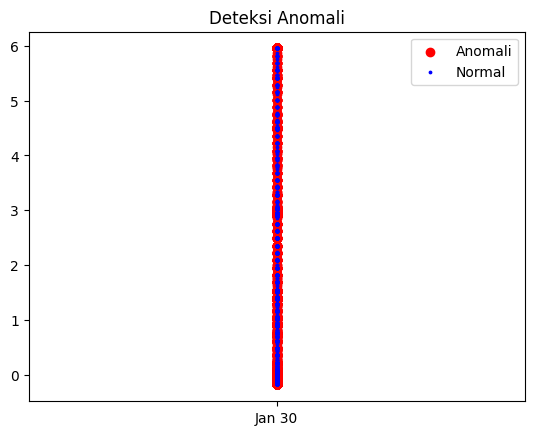

In [21]:
from sklearn.ensemble import IsolationForest

X = df[['frame.number', 'frame.len', 'ip.src', 'ip.dst', 'ip.proto', 'tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.options.timestamp.tsval', 'tcp.options.timestamp.tsecr']]

clf = IsolationForest(contamination=0.05, random_state=42)
y_pred = clf.fit_predict(X)
df['anomaly_label'] = y_pred  # Menambahkan prediksi sebagai label anomali

# Visualisasi hasil deteksi anomali
anomalies = df[df['anomaly_label'] == -1]
plt.scatter(anomalies.index, anomalies['frame.len'], color='red', label='Anomali')
plt.scatter(df.index, df['frame.len'], color='blue', s=3, label='Normal')
plt.title('Deteksi Anomali')
plt.legend(loc='upper right')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

X = df[['frame.number', 'frame.len', 'ip.src', 'ip.dst', 'ip.proto', 'tcp.srcport', 'tcp.dstport', 'tcp.seq', 'tcp.ack', 'tcp.options.timestamp.tsval', 'tcp.options.timestamp.tsecr']]
y = df['anomaly_label']  # Label target (0 untuk normal, 1 untuk anomali)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.ensemble import IsolationForest

# Buat model Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X_train)

# Melakukan prediksi pada data test
y_pred = clf.predict(X_test)

# Mengukur kinerja model
precision = precision_score(y_test, y_pred, pos_label=-1)
recall = recall_score(y_test, y_pred, pos_label=-1)
f1 = f1_score(y_test, y_pred, pos_label=-1)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC-ROC Score: {roc_auc:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Precision: 0.98
Recall: 0.98
F1 Score: 0.98
AUC-ROC Score: 0.99


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 2400    48]
 [   39 48165]]
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98      2448
           1       1.00      1.00      1.00     48204

    accuracy                           1.00     50652
   macro avg       0.99      0.99      0.99     50652
weighted avg       1.00      1.00      1.00     50652

